# **Implementation of knn and comparitive analysis with regression model for heart disease**

## **Importing Data**

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 30.6 MB/s eta 0:00:00


In [3]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt

import plotly.express as px
import random
import plotly.figure_factory as ff
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_rows",None)
from sklearn import preprocessing
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/DataSets/heart.csv")
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
df.shape

(918, 12)

In [6]:
df.size

11016

In [7]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [9]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [10]:
df.isnull().sum() #used to count the number of missing or null values in each column of a DataFrame

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [12]:
df.corr()   # used to compute the pairwise correlation of columns within a DataFrame

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


In [13]:
df.skew()  # calculates the skewness of numerical columns in a DataFrame

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

## **Data visualization**

In [14]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['Sex'].value_counts().values.tolist(),
                      x = df['Sex'].value_counts().index,
                      text=df['Sex'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['Sex'].value_counts().keys(),
                             values=df['Sex'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,800])
#Changing plot & figure background
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "Gender Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [15]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['ChestPainType'].value_counts().values.tolist(),
                      x = df['ChestPainType'].value_counts().index,
                      text=df['ChestPainType'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['ChestPainType'].value_counts().keys(),
                             values=df['ChestPainType'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,530])
#Changing plot & figure background
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "ChestPainType Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [16]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['FastingBS'].value_counts().values.tolist(),
                      x = df['FastingBS'].value_counts().index,
                      text=df['FastingBS'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['FastingBS'].value_counts().keys(),
                             values=df['FastingBS'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,800])
#Changing plot & figure background
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "FastingBS Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [17]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['RestingECG'].value_counts().values.tolist(),
                      x = df['RestingECG'].value_counts().index,
                      text=df['RestingECG'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['RestingECG'].value_counts().keys(),
                             values=df['RestingECG'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,600])
#Changing plot & figure background
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "RestingECG Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [18]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['ExerciseAngina'].value_counts().values.tolist(),
                      x = df['ExerciseAngina'].value_counts().index,
                      text=df['ExerciseAngina'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['ExerciseAngina'].value_counts().keys(),
                             values=df['ExerciseAngina'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,600])
#Changing plot & figure background
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "ExerciseAngina Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [19]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['ST_Slope'].value_counts().values.tolist(),
                      x = df['ST_Slope'].value_counts().index,
                      text=df['ST_Slope'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['ST_Slope'].value_counts().keys(),
                             values=df['ST_Slope'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,500])
#Changing plot & figure background
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "ST_Slope Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)


In [20]:
colors = px.colors.cyclical.Twilight
fig = make_subplots(rows=1,cols=2,
                    subplot_titles=('Countplot',
                                    'Percentages'),
                    specs=[[{"type": "xy"},
                            {'type':'domain'}]])
fig.add_trace(go.Bar(y = df['HeartDisease'].value_counts().values.tolist(),
                      x = df['HeartDisease'].value_counts().index,
                      text=df['HeartDisease'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)
fig.add_trace((go.Pie(labels=df['HeartDisease'].value_counts().keys(),
                             values=df['HeartDisease'].value_counts().values,textfont = dict(size = 16),
                     hole = .4,
                     marker=dict(colors=colors),
                     textinfo='label+percent',
                     hoverinfo='label')), row = 1, col = 2)
fig.update_yaxes(range=[0,550])
#Changing plot & figure background
fig.update_layout(
                    paper_bgcolor= '#FFFDE7',
                    plot_bgcolor= '#FFFDE7',
                    title=dict(text = "HeartDisease Distribution",x=0.5,y=0.95),
                    title_font_size=30
                  )
iplot(fig)

In [21]:
df_nunique = {var: pd.DataFrame(df[var].value_counts())
              for var in {'Sex', 'ChestPainType', 'FastingBS', 'RestingECG',
                          'ExerciseAngina', 'ST_Slope', 'HeartDisease'}}

# Display tables side by side
for var in df_nunique:
    display(df_nunique[var].style
            .format('{:.2f}')
            .highlight_max(color='lightgreen')
            .highlight_min(color='coral'))


,ChestPainType
ASY,496.00
NAP,203.00
ATA,173.00
TA,46.00


,Sex
M,725.00
F,193.00


,ExerciseAngina
N,547.00
Y,371.00


,RestingECG
Normal,552.00
LVH,188.00
ST,178.00


,ST_Slope
Flat,460.00
Up,395.00
Down,63.00


,FastingBS
0,704.00
1,214.00


,HeartDisease
1,508.00
0,410.00


In [22]:
# Using facet_row and or facet_col arguments to create Sub plots
fig = px.scatter(df,
                 x=df.Age,
                 y=df.Cholesterol,
                 color=df.HeartDisease,
                 facet_col=df.FastingBS,
                 facet_row=df.Sex,
                 color_discrete_map={1: "#FF5722",0: "#7CB342"},
                 width=950,
                 height=800,
                 title="HeartDisease Data")

fig.update_layout(
                    plot_bgcolor= "#dcedc1",
                    paper_bgcolor="#FFFDE7",
                 )


fig.show()
#po.plot(fig)

In [23]:
cat = ['Sex', 'ChestPainType','FastingBS','RestingECG',
                          'ExerciseAngina',  'ST_Slope','HeartDisease']
num = ['Age','RestingBP','Cholesterol','MaxHR','Oldpeak']

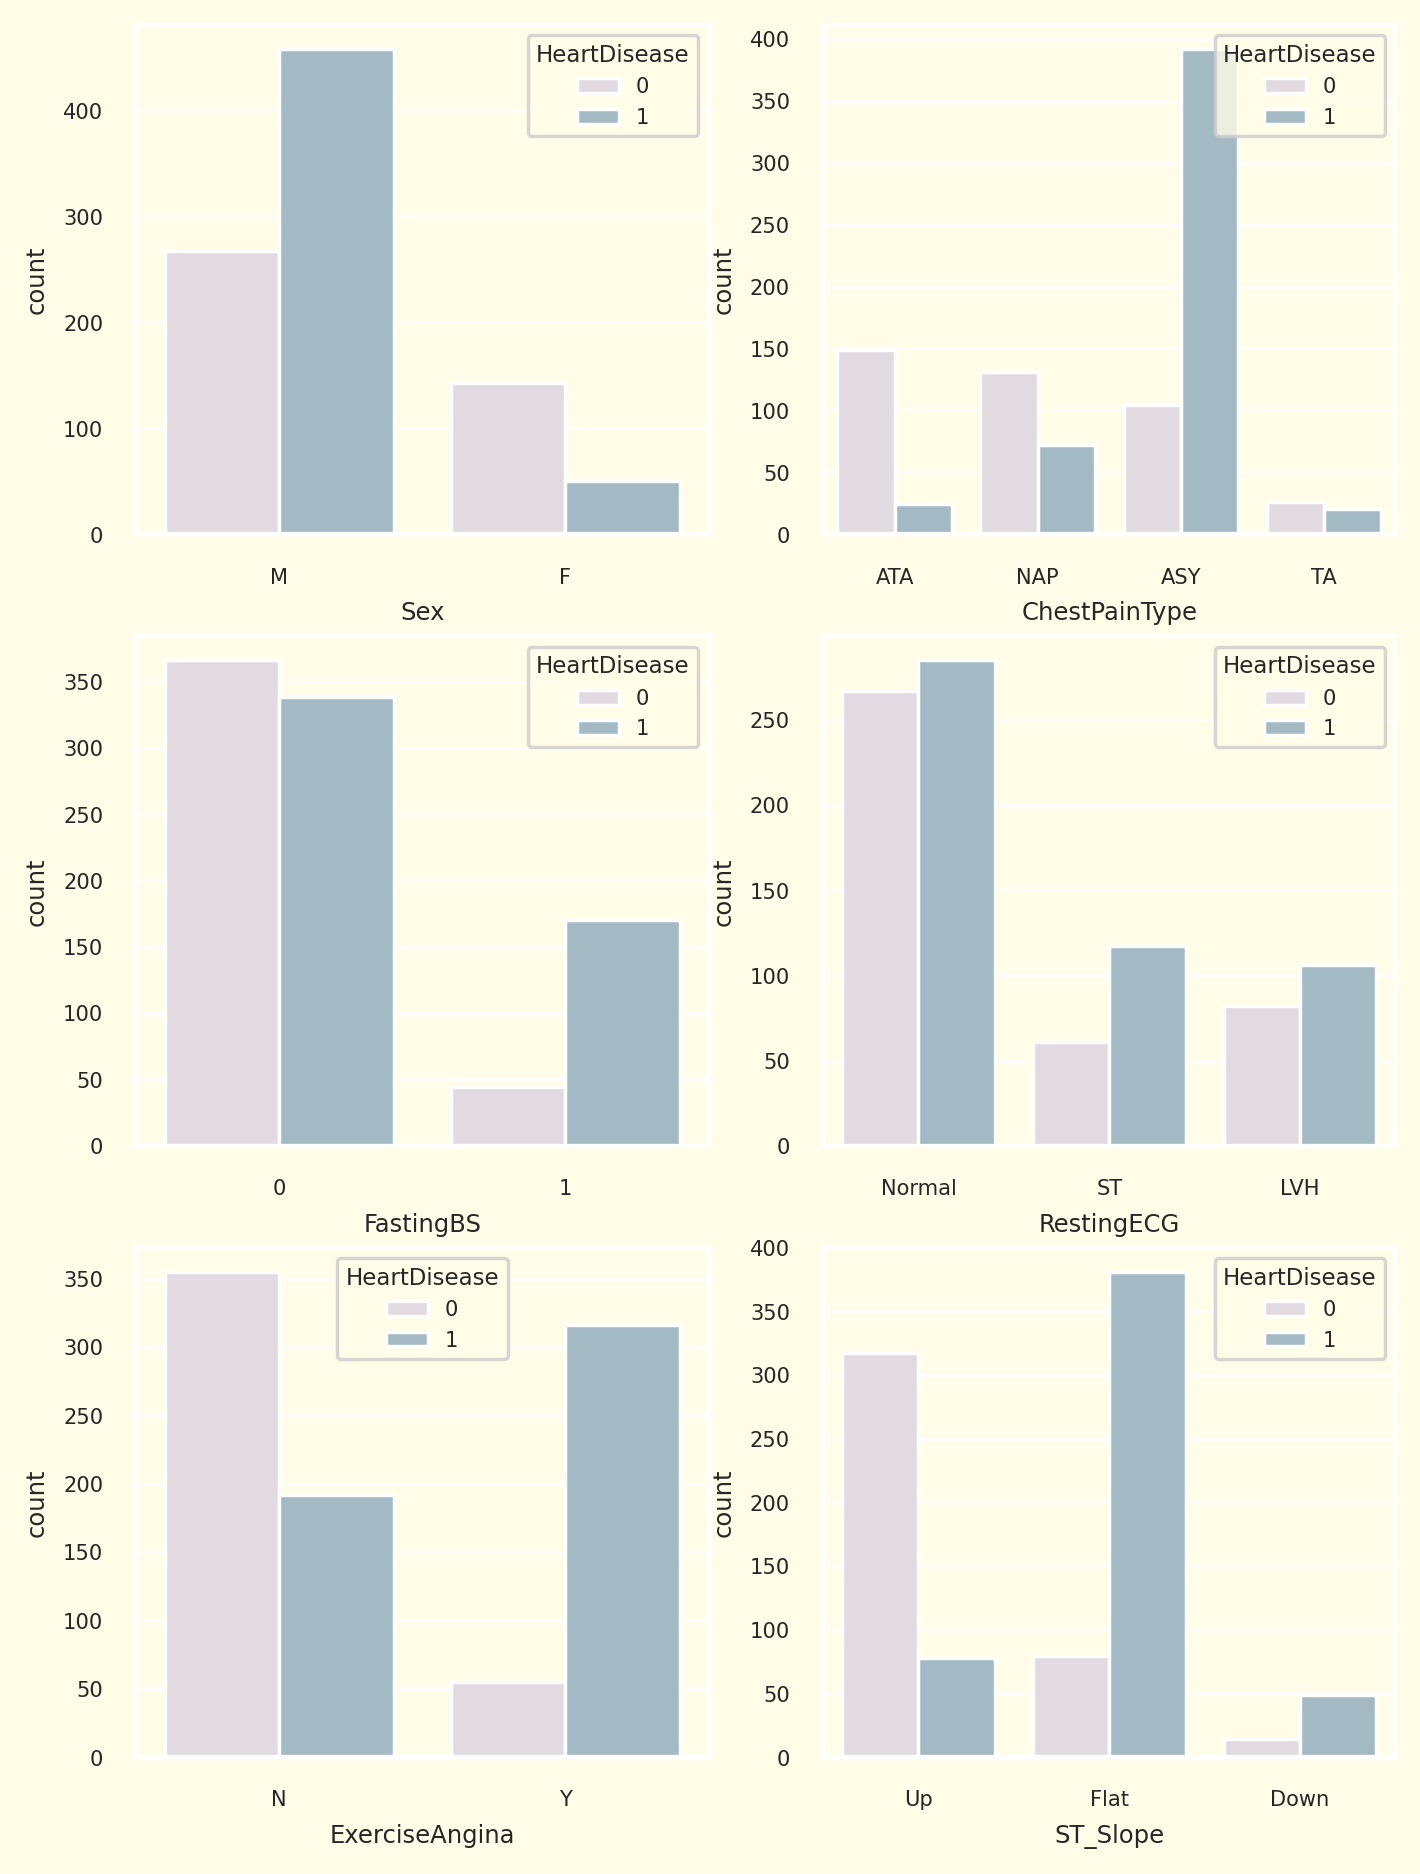

In [24]:
import seaborn as sns
sns.set_theme(rc = {'figure.dpi': 250, 'axes.labelsize': 7,
                    'axes.facecolor': '#FFFDE7', 'grid.color': '#fffdfa',
                    'figure.facecolor': '#FFFDE7'}, font_scale = 0.55)
fig, ax = plt.subplots(3, 2, figsize = (6.5, 9))
for indx, (column, axes) in list(enumerate(list(zip(cat, ax.flatten())))):
    if column not in 'HearDisease':
        sns.countplot(ax = axes, x = df[column], hue = df['HeartDisease'], palette = colors, alpha = 1)
else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]
axes_legend = ax.flatten()
axes_legend[1].legend(title = 'HeartDisease', loc = 'upper right')
axes_legend[2].legend(title = 'HeartDisease', loc = 'upper right')
plt.show()

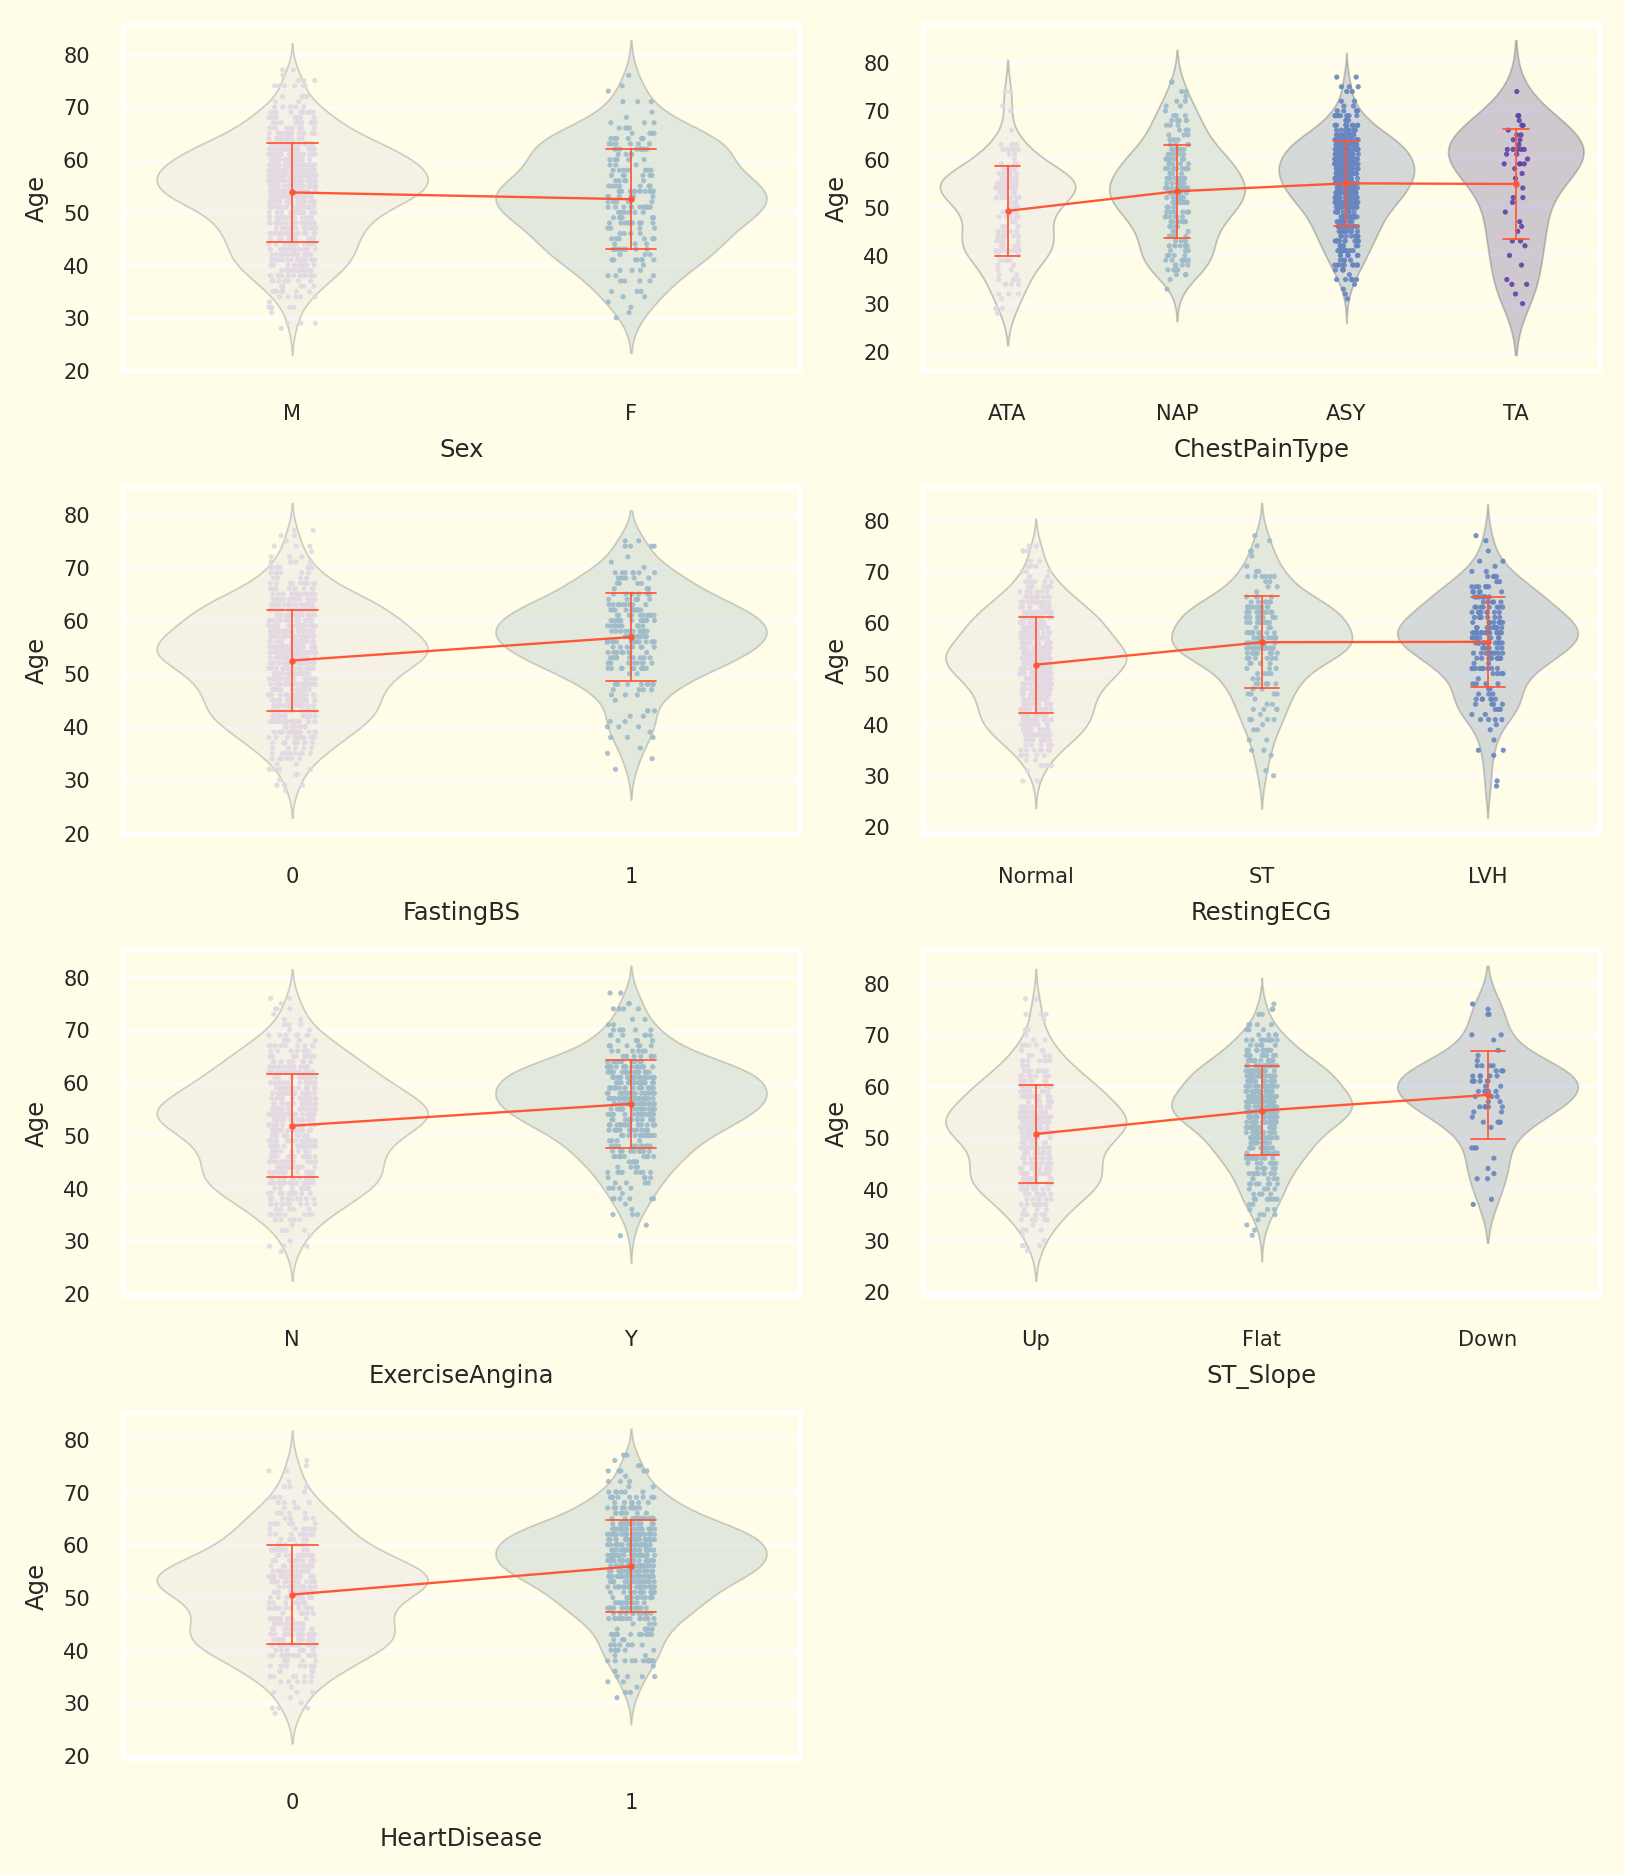

In [25]:
sns.set_theme(rc = {'figure.dpi': 250, 'axes.labelsize': 7,
                    'axes.facecolor': '#FFFDE7', 'grid.color': '#fffdfa',
                    'figure.facecolor': '#FFFDE7'}, font_scale = 0.55)
fig, ax = plt.subplots(4, 2, figsize = (6.5, 7.5))
for indx, (column, axes) in list(enumerate(list(zip(cat, ax.flatten())))):

    sns.violinplot(ax = axes, x = df[column],
                   y = df['Age'],
                   scale = 'width', linewidth = 0.5,
                   palette = colors, inner = None)

    plt.setp(axes.collections, alpha = 0.3)

    sns.stripplot(ax = axes, x = df[column],
                  y = df['Age'],
                  palette = colors, alpha = 0.9,
                  s = 1.5, jitter = 0.07)
    sns.pointplot(ax = axes, x = df[column],
                  y = df['Age'],
                  color = '#ff5736', scale = 0.25,
                  estimator = np.mean, ci = 'sd',
                  errwidth = 0.5, capsize = 0.15, join = True)

    plt.setp(axes.lines, zorder = 100)
    plt.setp(axes.collections, zorder = 100)

else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]

plt.tight_layout()
plt.show()

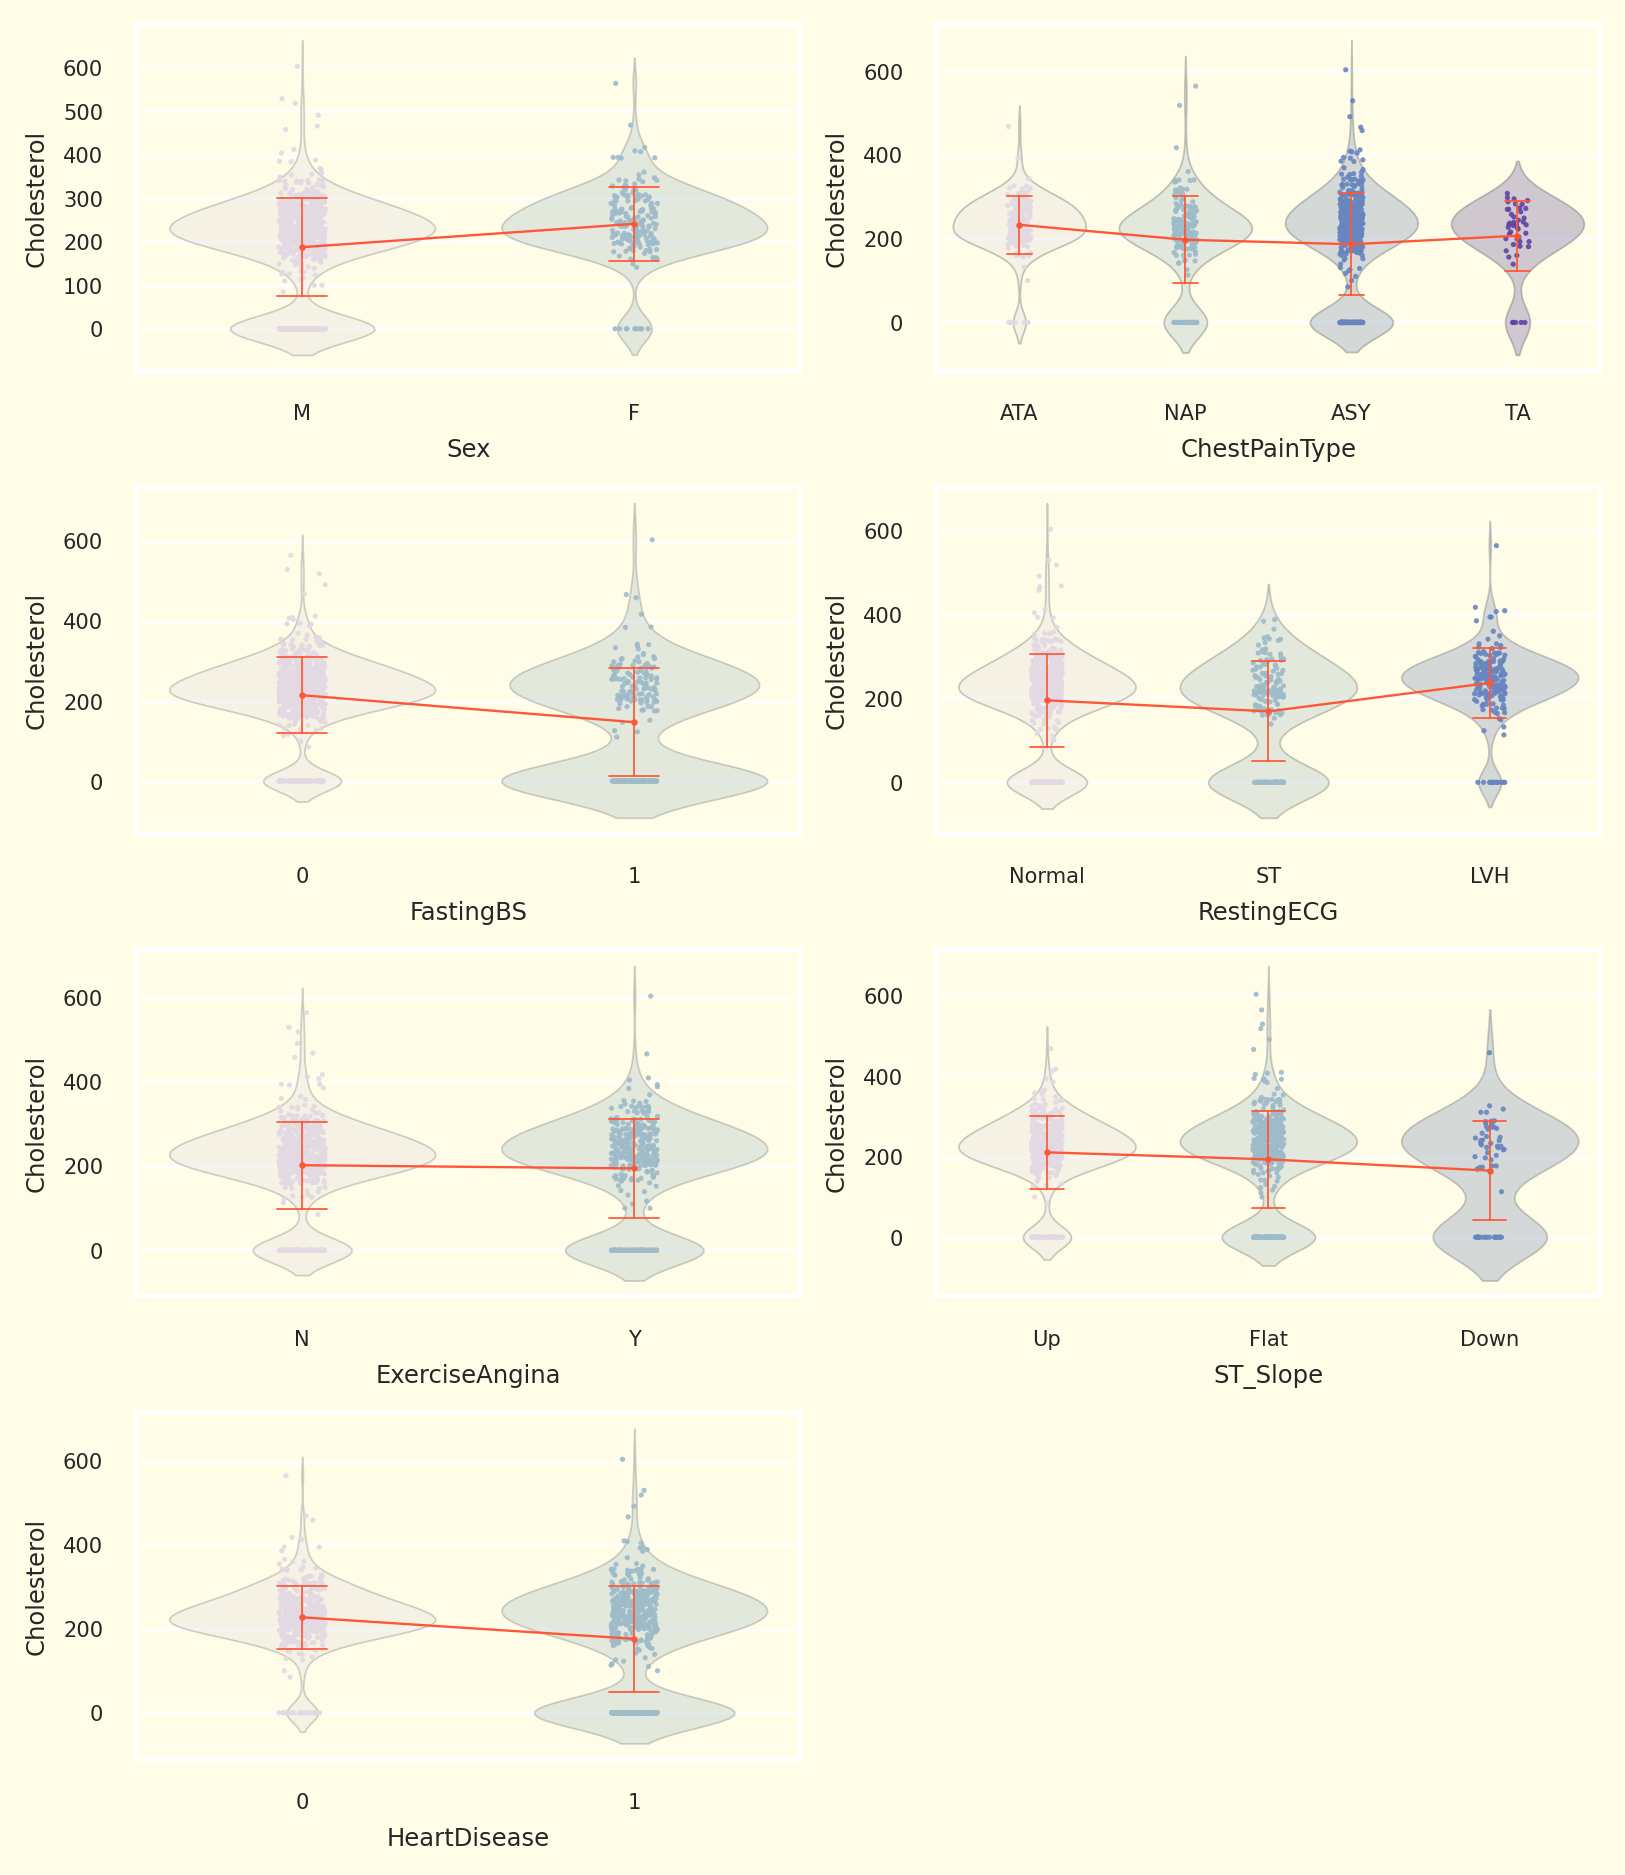

In [26]:
sns.set_theme(rc = {'figure.dpi': 250, 'axes.labelsize': 7,
                    'axes.facecolor': '#FFFDE7', 'grid.color': '#fffdfa',
                    'figure.facecolor': '#FFFDE7'}, font_scale = 0.55)
fig, ax = plt.subplots(4, 2, figsize = (6.5, 7.5))
for indx, (column, axes) in list(enumerate(list(zip(cat, ax.flatten())))):

    sns.violinplot(ax = axes, x = df[column],
                   y = df['Cholesterol'],
                   scale = 'width', linewidth = 0.5,
                   palette = colors, inner = None)

    plt.setp(axes.collections, alpha = 0.3)

    sns.stripplot(ax = axes, x = df[column],
                  y = df['Cholesterol'],
                  palette = colors, alpha = 0.9,
                  s = 1.5, jitter = 0.07)
    sns.pointplot(ax = axes, x = df[column],
                  y = df['Cholesterol'],
                  color = '#ff5736', scale = 0.25,
                  estimator = np.mean, ci = 'sd',
                  errwidth = 0.5, capsize = 0.15, join = True)

    plt.setp(axes.lines, zorder = 100)
    plt.setp(axes.collections, zorder = 100)

else:
    [axes.set_visible(False) for axes in ax.flatten()[indx + 1:]]

plt.tight_layout()
plt.show()

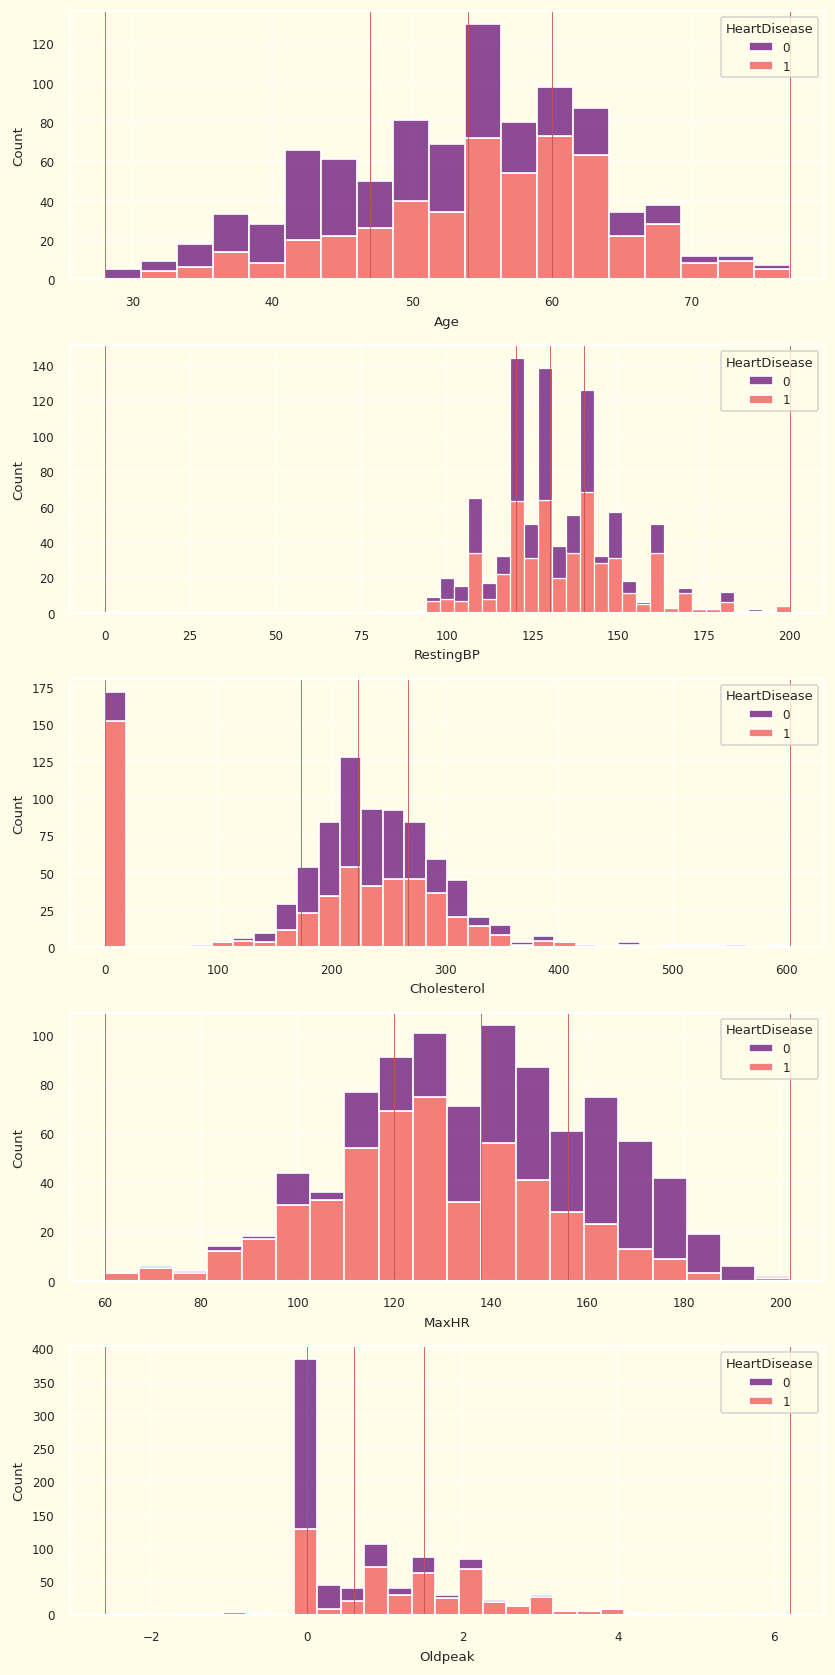

In [27]:
sns.set_theme(rc = {'figure.dpi': 120, 'axes.labelsize': 8,
                    'axes.facecolor': '#FFFDE7', 'grid.color': '#fffdfa',
                    'figure.facecolor': '#FFFDE7'}, font_scale = 0.65)

fig, ax = plt.subplots(5, 1, figsize = (7, 14))

for indx, (column, axes) in list(enumerate(list(zip(num, ax.flatten())))):

    sns.histplot(ax = axes, x = df[column], hue = df['HeartDisease'],
                 palette = 'magma', alpha = 0.8, multiple = 'stack')

    legend = axes.get_legend() # sns.hisplot has some issues with legend
    handles = legend.legendHandles
    legend.remove()
    axes.legend(handles, ['0', '1'], title = 'HeartDisease', loc = 'upper right')
    Quantiles = np.quantile(df[column], [0, 0.25, 0.50, 0.75, 1])

    for q in Quantiles: axes.axvline(x = q, linewidth = 0.5, color = 'r')

plt.tight_layout()
plt.show()

In [28]:
# Plot a subset of variables
df1 = df[df['HeartDisease'].isin([0,1])]
df1.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


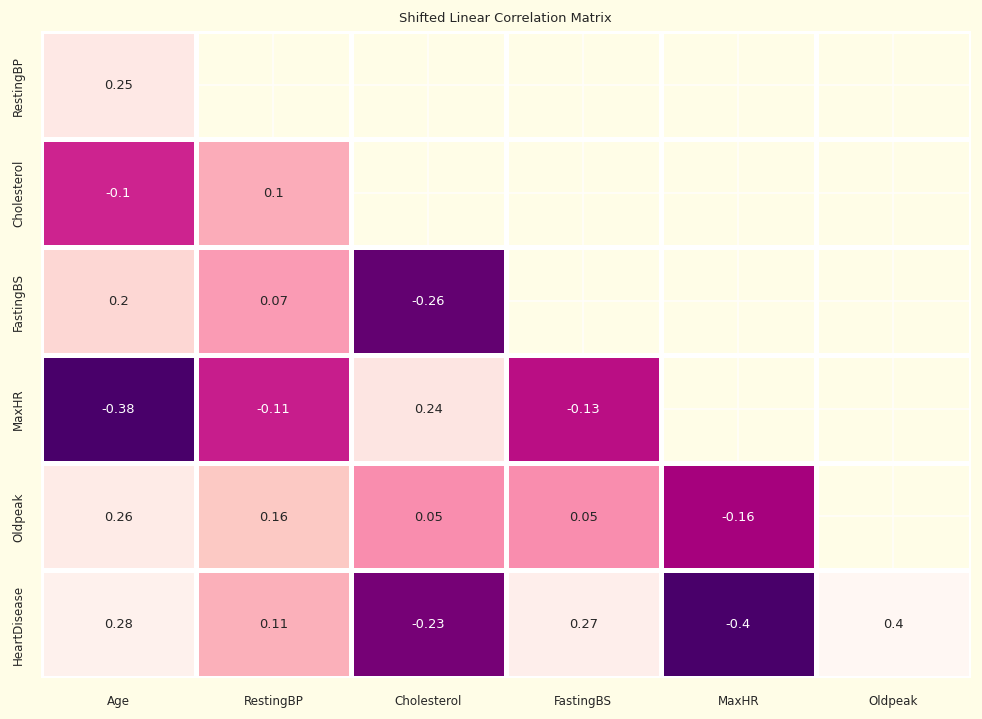

In [29]:
def corrMat(df,id=False):

    corr_mat = df.corr().round(2)
    f, ax = plt.subplots(figsize=(10,7))
    mask = np.triu(np.ones_like(corr_mat, dtype=bool))
    mask = mask[1:,:-1]
    corr = corr_mat.iloc[1:,:-1].copy()
    sns.heatmap(corr,mask=mask,vmin=-0.3,vmax=0.3,center=0,
                cmap='RdPu_r',square=False,lw=2,annot=True,cbar=False)
#     bottom, top = ax.get_ylim()
#     ax.set_ylim(bottom + 0.5, top - 0.5)
    ax.set_title('Shifted Linear Correlation Matrix')

corrMat(df)


In [30]:
df2 = df.groupby('Sex').agg({'Age' : 'mean', "ChestPainType":'count','RestingBP':'mean','Cholesterol':'mean',
                            'FastingBS':'sum','RestingECG':'count','MaxHR':'mean','ExerciseAngina':'count','Oldpeak':'mean',
                            'ST_Slope':'count','HeartDisease':'sum'})
df2

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
Sex,,,,,,,,,,,
F,52.492228,193,132.212435,241.196891,26,193,146.139896,193,0.668912,193,50
M,53.782069,725,132.445517,187.513103,188,725,134.325517,725,0.945517,725,458


In [31]:
px.bar(data_frame=df2, barmode='group',
       title = "<b>Gender wise Analyzing</b>",template="plotly_dark")

In [32]:
def count_outliers(data,col):
        q1 = data[col].quantile(0.25,interpolation='nearest')
        q2 = data[col].quantile(0.5,interpolation='nearest')
        q3 = data[col].quantile(0.75,interpolation='nearest')
        q4 = data[col].quantile(1,interpolation='nearest')
        IQR = q3 -q1
        global LLP
        global ULP
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        if data[col].min() > LLP and data[col].max() < ULP:
            print("No outliers in",i)
        else:
            print("There are outliers in",i)
            x = data[data[col]<LLP][col].size
            y = data[data[col]>ULP][col].size
            a.append(i)
            print('Count of outliers are:',x+y)
global a
a = []
for i in num:
    count_outliers(df,i)

No outliers in Age
There are outliers in RestingBP
Count of outliers are: 28
There are outliers in Cholesterol
Count of outliers are: 183
There are outliers in MaxHR
Count of outliers are: 2
There are outliers in Oldpeak
Count of outliers are: 16


## **Data Preprocessing**

In [33]:
def LABEL_ENCODING(c1):                                # Declare the function with name of LABEL_ENCODING which take single parameter c1
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()       # LabelEncoder is used to convert categorical labels (in this case, values in a column) into numerical labels.
    df[c1]= label_encoder.fit_transform(df[c1])       #  It uses the fit_transform method of the LabelEncoder object to transform the categorical values into numerical labels and assigns these transformed values back to the same column
    df[c1].unique()


In [34]:
LABEL_ENCODING("Sex")
LABEL_ENCODING("ChestPainType")           # Applying the label encoding to the defined coloumns in the dataset
LABEL_ENCODING("RestingECG")
LABEL_ENCODING("ExerciseAngina")
LABEL_ENCODING("ST_Slope")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


## **Feature Scaling**

In [35]:
scaler = StandardScaler()                         #used for standardizing features by removing the mean and scaling to unit variance
scaler.fit(df.drop('HeartDisease',axis = 1))

StandardScaler()

In [36]:
scaled_features = scaler.transform(df.drop('HeartDisease',axis = 1))        #Applies the standardization feature except HeartDisease coloumn
df_feat = pd.DataFrame(scaled_features,columns = df.columns[:-1])
df_feat.head()                    #showing the standardized values for the features.

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,-1.433140,0.515952,0.229032,0.410909,0.825070,-0.551341,0.017255,1.382928,-0.823556,-0.832432,1.052114
1,-0.478484,-1.938163,1.275059,1.491752,-0.171961,-0.551341,0.017255,0.754157,-0.823556,0.105664,-0.596078
2,-1.751359,0.515952,0.229032,-0.129513,0.770188,-0.551341,1.601219,-1.525138,-0.823556,-0.832432,1.052114
3,-0.584556,-1.938163,-0.816995,0.302825,0.139040,-0.551341,0.017255,-1.132156,1.214246,0.574711,-0.596078
4,0.051881,0.515952,1.275059,0.951331,-0.034755,-0.551341,0.017255,-0.581981,-0.823556,-0.832432,1.052114


## **Feature Selection**

In [37]:
#Splitting the data into the training and testing sets
X = df_feat                    # DataFrame containing the standardized features obtained after preprocessing except Heart disease coloumn

y = df['HeartDisease']        # Containing the 'HeartDisease' column from the original DataFrame

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)   #30 % of data for the tesing purpose & 70 % of data for the traning purpose

## **KNN Model**


In [38]:
knn = KNeighborsClassifier(n_neighbors = 9)       # identify the 9 nearest neighbors in the training dataset
knn.fit(X_train,y_train)            #

KNeighborsClassifier(n_neighbors=9)

In [39]:
pred = knn.predict(X_test)        # It takes the test data as an input for the KNN model
pred                              # it predicts the class of the each data input in the test dataset

array([0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [40]:
print(confusion_matrix(y_test,pred))    # Evaluating the performace of the KNN using confusion

[[105  21]
 [ 21 129]]


In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       126
           1       0.86      0.86      0.86       150

    accuracy                           0.85       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.85      0.85      0.85       276



In [42]:
error_rate= []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

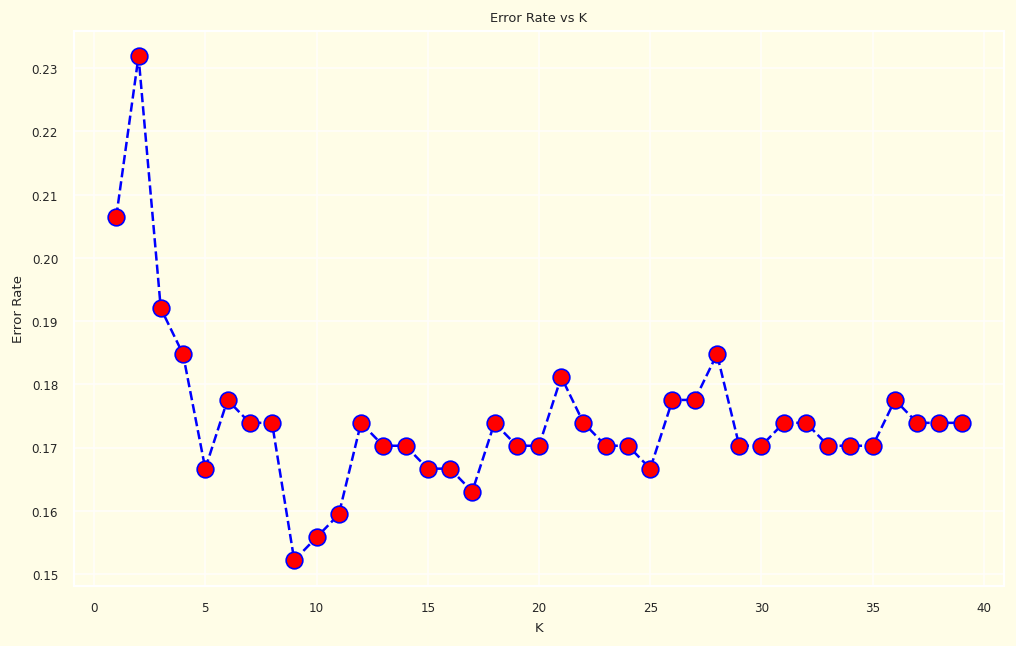

In [43]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate,color = 'blue',linestyle = '--',marker = 'o',markerfacecolor='red',markersize = 10)
plt.title('Error Rate vs K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [44]:
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.8478260869565217


Advantages of KNN Algorithm:

It is simple to implement.

It is robust to the noisy training data

 It can be more effective if the training data is large.


 Disadvantages of KNN Algorithm:

Always needs to determine the value of K which may be complex some time.

The computation cost is high because of calculating the distance between the data points for all the training samples.

## **logistic regression model**

In [46]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
pred = logmodel.predicted(X_test)

AttributeError: 'LogisticRegression' object has no attribute 'predicted'

In [ ]:
print(confusion_matrix(y_test,pred))

[[101  25]
 [ 19 131]]


In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.80      0.82       126
           1       0.84      0.87      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276



In [ ]:
print('Accuracy:',logmodel.score(X_test,y_test))

Accuracy: 0.8405797101449275


## **Comparative Analysis**

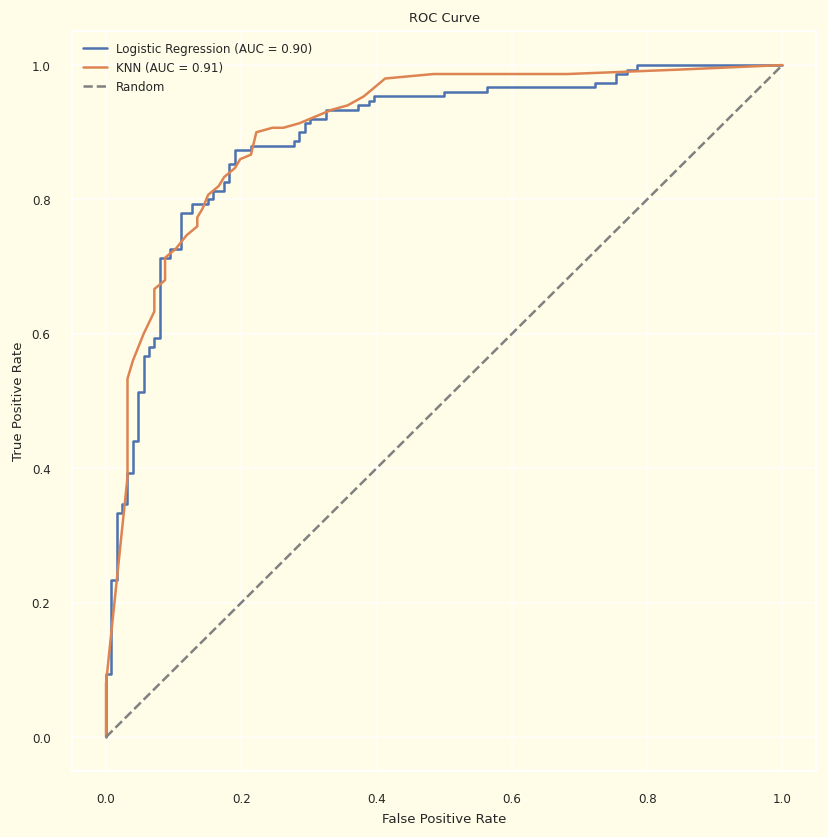

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression
logmodel_probs = logmodel.predict_proba(X_test)[:, 1]
fpr_logmodel, tpr_logmodel, _ = roc_curve(y_test, logmodel_probs)
roc_auc_logmodel = auc(fpr_logmodel, tpr_logmodel)

# KNN
knn_probs = knn.predict_proba(X_test)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, knn_probs)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC Curve
plt.figure(figsize=(8, 8))
plt.plot(fpr_logmodel, tpr_logmodel, label=f'Logistic Regression (AUC = {roc_auc_logmodel:.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Logistic Regression
logmodel_report = classification_report(y_test, logmodel.predict(X_test))

# KNN
knn_report = classification_report(y_test, knn.predict(X_test))

print("Logistic Regression Classification Report:\n", logmodel_report)
print("KNN Classification Report:\n", knn_report)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.80      0.82       126
           1       0.84      0.87      0.86       150

    accuracy                           0.84       276
   macro avg       0.84      0.84      0.84       276
weighted avg       0.84      0.84      0.84       276

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.85      0.82       126
           1       0.86      0.81      0.83       150

    accuracy                           0.83       276
   macro avg       0.83      0.83      0.83       276
weighted avg       0.83      0.83      0.83       276

